<a href="https://colab.research.google.com/github/JulioLaz/financial_fraud_detection/blob/development/Financial_Fraud_Detection_JAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**PROBLEMA DE NEGOCIO**


---




La urgencia por detectar fraudes en transacciones móviles de dinero ha llevado a una empresa del segmento Fintech a buscar soluciones innovadoras. Como científicos de datos hemos sido convocados para desarrollar un modelo de machine learning que pueda distinguir de manera precisa entre transacciones legítimas y fraudulentas, estableciendo así un estándar de seguridad en el sector financiero móvil global.

### **Tus tareas principales serán:**

**1. Preprocesamiento de Datos:** Realizar limpieza de datos, manejar valores faltantes, codificación de variables categóricas y normalización/escalado de datos.

**2. Exploración de Datos:** Analizar y comprender el conjunto de datos proporcionado, identificar variables llaves y realizar visualizaciones para entender las relaciones entre las variables y seleccionar las características relevantes.

**3. Construcción de Modelos:** Experimentar con algunos algoritmos de machine learning como Regresión Logística, Árboles de Decisión, Random Forest, Naive Bayes, entre otros.

**4. Evaluación y Selección del Modelo:** Evaluar los modelos utilizando métricas como precisión, recall, área bajo la curva ROC, y F1-score. Seleccionar el modelo con el mejor rendimiento para la detección de transacciones bancarias fraudulentas.

# DATASET EN KAGGLE:
**https://www.kaggle.com/datasets/ealaxi/paysim1**

#Acerca del conjunto de datos
##Contexto
Hay una falta de conjuntos de datos públicos disponibles sobre servicios financieros y especialmente en el ámbito emergente de las transacciones de dinero móvil. Los conjuntos de datos financieros son importantes para muchos investigadores y, en particular, para nosotros que realizamos investigaciones en el ámbito de la detección de fraude. Parte del problema es la naturaleza intrínsecamente privada de las transacciones financieras, que lleva a que no haya conjuntos de datos disponibles públicamente.

Presentamos un conjunto de datos sintéticos generados utilizando el simulador llamado PaySim como una aproximación a dicho problema. PaySim utiliza datos agregados del conjunto de datos privado para generar un conjunto de datos sintéticos que se asemeja al funcionamiento normal de las transacciones e inyecta comportamiento malicioso para evaluar posteriormente el rendimiento de los métodos de detección de fraude.

##Contenido
PaySim simula transacciones de dinero móvil basándose en una muestra de transacciones reales extraídas de un mes de registros financieros de un servicio de dinero móvil implementado en un país africano. Los registros originales fueron proporcionados por una empresa multinacional, que es el proveedor del servicio financiero móvil que actualmente funciona en más de 14 países de todo el mundo.

Este conjunto de datos sintéticos se reduce a 1/4 del conjunto de datos original y se crea solo para Kaggle.

* **NOTA: Las transacciones que se detectan como fraude se cancelan, por lo que para la detección de fraude no se deben utilizar estas columnas (oldbalanceOrg, newbalanceOrig, oldbalanceDest, newbalanceDest).**

**step**: asigna una unidad de tiempo en el mundo real. En este caso 1 paso es 1 hora de tiempo. Pasos totales 744 (simulación de 30 días).

**type**: CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.

**amount**: monto de la transacción en moneda local.

**nameOrig**: cliente que inició la transacción

**oldbalanceOrg**: saldo inicial antes de la transacción

**newbalanceOrig**: nuevo saldo después de la transacción.

**nameDest**: cliente que es el destinatario de la transacción

**oldbalanceDest**: destinatario del saldo inicial antes de la transacción. Tenga en cuenta que no hay información para los clientes que comienzan con M (Comerciantes).

**newbalanceDest**: destinatario del nuevo saldo después de la transacción. Tenga en cuenta que no hay información para los clientes que comienzan con M (Comerciantes).

**isFraud**: son las transacciones realizadas por los agentes fraudulentos dentro de la simulación. En este conjunto de datos específico, el comportamiento fraudulento de los agentes tiene como objetivo obtener ganancias tomando el control de las cuentas de los clientes e intentar vaciar los fondos transfiriéndolos a otra cuenta y luego cobrándolos del sistema.

**isFlaggedFraud**: el modelo de negocio tiene como objetivo controlar las transferencias masivas de una cuenta a otra y detectar intentos ilegales. Un intento ilegal en este conjunto de datos es un intento de transferir más de 200.000 en una sola transacción.

#**1. Configuración del Ambiente**


---




In [ ]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
!pip install -U imbalanced-learn
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import matplotlib.ticker as ticker
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, roc_curve
pd.set_option('display.float_format', '{:.2f}'.format)
import os
from google.colab import files
from IPython.display import display, HTML

import time
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from datetime import timedelta
from imblearn.over_sampling import RandomOverSampler
global df_banco_bigdata

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 kB 5.3 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.10.1
    Uninstalling imbalanced-learn-0.10.1:
      Successfully uninstalled imbalanced-learn-0.10.1


Python 3.10.12
------
Name: pandas
Version: 2.0.3
------
Name: matplotlib
Version: 3.7.1

##  Subir de tu cuenta kaggle el archivo kaggle.json
1. Ve a tu perfil de Kaggle y descarga API key (kaggle.json).
2. En Colab, sube el archivo kaggle.json. Puedes hacerlo haciendo clic en el ícono de carpeta a la izquierda, luego en el ícono de subir (archivo con una flecha hacia arriba).

In [ ]:
# Subir el archivo kaggle.json desde donde lo guardaste:
files.upload()
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d ealaxi/paysim1
!unzip paysim1.zip

Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/ealaxi/paysim1
License(s): CC-BY-SA-4.0
 91% 162M/178M [00:01<00:00, 102MB/s]
100% 178M/178M [00:01<00:00, 124MB/s]
Archive:  paysim1.zip
  inflating: PS_20174392719_1491204439457_log.csv  


In [ ]:
# Cargar el dataset en un DataFrame (ajusta el nombre del archivo CSV según corresponda)
df_banco_bigdata = pd.read_csv('/content/PS_20174392719_1491204439457_log.csv')
df_banco_bigdata.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0


## Mejorar el uso de memoria:

In [ ]:
def optimizar_mem(df_banco_bigdata):
    mem_before = df_banco_bigdata.memory_usage(deep=True).sum()

    df_banco_bigdata['step'] = df_banco_bigdata['step'].astype('int16')
    df_banco_bigdata['amount'] = df_banco_bigdata['amount'].astype('int32')
    df_banco_bigdata['oldbalanceOrg'] = df_banco_bigdata['oldbalanceOrg'].astype('float32')
    df_banco_bigdata['newbalanceOrig'] = df_banco_bigdata['newbalanceOrig'].astype('float32')
    df_banco_bigdata['oldbalanceDest'] = df_banco_bigdata['oldbalanceDest'].astype('float32')
    df_banco_bigdata['newbalanceDest'] = df_banco_bigdata['newbalanceDest'].astype('float32')
    df_banco_bigdata['isFraud'] = df_banco_bigdata['isFraud'].astype('int8')
    df_banco_bigdata['isFlaggedFraud'] = df_banco_bigdata['isFlaggedFraud'].astype('int8')

    print("Después de la conversión:")
    print('-'*60)
    print(df_banco_bigdata.info())
    print('-'*60)
    mem_after = df_banco_bigdata.memory_usage(deep=True).sum()
    print(f"Uso de memoria antes de la conversión: {mem_before / 1024**2:.2f} MB")
    print(f"Uso de memoria después de la conversión: {mem_after / 1024**2:.2f} MB")
optimizar_mem(df_banco_bigdata)

Después de la conversión:
------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int16  
 1   type            object 
 2   amount          int32  
 3   nameOrig        object 
 4   oldbalanceOrg   float32
 5   newbalanceOrig  float32
 6   nameDest        object 
 7   oldbalanceDest  float32
 8   newbalanceDest  float32
 9   isFraud         int8   
 10  isFlaggedFraud  int8   
dtypes: float32(4), int16(1), int32(1), int8(2), object(3)
memory usage: 291.3+ MB
None
------------------------------------------------------------
Uso de memoria antes de la conversión: 1598.19 MB
Uso de memoria después de la conversión: 1355.48 MB


In [ ]:
df_banco_bigdata.sample(4)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
4673859,331,PAYMENT,11046,C1035155826,0.00,0.00,M1386530912,0.00,0.00,0,0
1473349,141,PAYMENT,10042,C1682765943,523.96,0.00,M1495796543,0.00,0.00,0,0
1542364,154,CASH_OUT,242929,C1218632335,45553.00,0.00,C1397294127,0.00,242929.77,0,0
2216261,186,PAYMENT,7423,C422164416,516.00,0.00,M1823444190,0.00,0.00,0,0


#**2. Preprocesamiento de Datos**


---

Para comenzar con el analísis del problema es necesario realizar el preprocesamiento de los datos para saber si existen algunas situaciones que requieran de nuestra atención y que en el futuro puedan traernos algunas dificultades.

Lo primero es vaciar nuestros datos en un dataframe de pandas, en este caso estamos utulizando un archivo obtenido de Pay Sim.

PaySim simula transacciones de dinero móvil basadas en una muestra de transacciones reales extraídas de un mes de registros financieros de un servicio de dinero móvil implementado en un país africano. Los registros originales fueron proporcionados por una empresa multinacional, que es el proveedor del servicio financiero móvil que actualmente opera en más de 14 países en todo el mundo.

Este conjunto de datos sintéticos se ha reducido a 1/4 del conjunto de datos original y se ha creado exclusivamente para Kaggle.



In [ ]:
df_banco_bigdata.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6362620.00,6362620.00,6362620.00,6362620.00,6362620.00,6362620.00,6362620.00,6362620.00
mean,243.40,179861.41,833883.38,855113.69,1100701.75,1224996.88,0.00,0.00
std,142.33,603858.24,2888242.50,2924048.50,3399180.25,3674129.00,0.04,0.00
min,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,156.00,13389.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,239.00,74871.50,14208.00,0.00,132705.66,214661.45,0.00,0.00
75%,335.00,208721.00,107315.18,144258.41,943036.69,1111909.22,0.00,0.00
max,743.00,92445516.00,59585040.00,49585040.00,356015904.00,356179264.00,1.00,1.00


In [ ]:
df_banco_bigdata.sample(3)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
1370353,138,PAYMENT,10356,C1789252443,2773.00,0.00,M1696006905,0.00,0.00,0,0
2025390,180,CASH_IN,317301,C61256748,6261084.00,6578385.50,C361775930,3822907.00,3505605.50,0,0
2526107,205,PAYMENT,14164,C1801886096,8623.15,0.00,M770641016,0.00,0.00,0,0


##2.1 Eliminar variables convenientemente:



1. Según la Nota acerca del conjunto de datos las siguientes columnas se deben eliminar:
* oldbalanceOrg
* newbalanceOrig
* oldbalanceDest
* newbalanceDest

2. La variable 'isFlaggedFraud'  está contenida en isFraud, por lo cual es conveniente eliminarla (Ver info de las variables).

In [ ]:
# Lista de columnas a eliminar:
columns_to_drop = ['oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'isFlaggedFraud']
df_banco_bigdata = df_banco_bigdata.drop(columns=columns_to_drop)
print("Columnas después de eliminar las especificadas:")
df_banco_bigdata.columns

Columnas después de eliminar las especificadas:


Index(['step', 'type', 'amount', 'nameOrig', 'nameDest', 'isFraud'], dtype='object')

3. Las columnas:
* **nameOrig** (cliente que inició la transacción.)
* **nameDest** (cliente que es el destinatario de la transacción.)

serán aunadas en una sóla columna orig_dest según la letra de origen y de destino que encabeza cada valor.

In [ ]:
df_banco_bigdata['orig_dest'] = df_banco_bigdata['nameOrig'].str[0] + df_banco_bigdata['nameDest'].str[0]
df_banco_bigdata = df_banco_bigdata.drop(columns=['nameOrig','nameDest'])

In [ ]:
df_banco_bigdata.head(2)

,step,type,amount,isFraud,orig_dest
0,1,PAYMENT,9839,0,CM
1,1,PAYMENT,1864,0,CM


##2.2 Tratamiento de nulos y duplicados:

In [ ]:
def null_duplicates(df_banco_bigdata):
  null = df_banco_bigdata.isnull().sum() # ver nulos
  duplicate = df_banco_bigdata[df_banco_bigdata.duplicated()]
  if null.sum()!=0:
    df_banco_bigdata = df_banco_bigdata.dropna()
    print('-'*60)
    print('Nulos:',null )
    print('-'*60)
  else: print('No existen nulos')
  if duplicate.shape[0]==0:
    print('-'*60)
    print('No existen filas duplicadas en el dataset!')
    print('-'*60)
  else:
    print('-'*60)
    print(f'Se eliminaron {len(duplicate.head())} filas duplicadas: ')
    print('-'*60)
    print( duplicate.head())
    df_banco_bigdata.drop_duplicates(inplace=True)
  if null.sum()==0 and duplicate.shape[0]==0:
    print('-'*60)
    print('No se realizaron cambios en el Dataset!')
    print('-'*60)
null_duplicates(df_banco_bigdata)

No existen nulos
------------------------------------------------------------
Se eliminaron 5 filas duplicadas: 
------------------------------------------------------------
     step     type  amount  isFraud orig_dest
298     1  PAYMENT    4059        0        CM
563     1  PAYMENT    2998        0        CM
726     1  PAYMENT    8690        0        CM
949     1  PAYMENT    1157        0        CM
955     1  PAYMENT    8348        0        CM


## Ver variables categoricas:

In [ ]:
categorical_columns = df_banco_bigdata.select_dtypes(include=['object']).columns
print("Columnas categóricas:", categorical_columns)

# Imprimir las categorías únicas de cada columna categórica:
for col in categorical_columns:
    unique_values = df_banco_bigdata[col].unique()
    print(f"Categorías en la columna '{col}':")
    print('-'*60)
    print(unique_values)
    print('-'*60)
    print("\n")

Columnas categóricas: Index(['type', 'orig_dest'], dtype='object')
Categorías en la columna 'type':
------------------------------------------------------------
['PAYMENT' 'TRANSFER' 'CASH_OUT' 'DEBIT' 'CASH_IN']
------------------------------------------------------------


Categorías en la columna 'orig_dest':
------------------------------------------------------------
['CM' 'CC']
------------------------------------------------------------




##2.3 Tratamiento de variable step:

### Crear columnas relacionadas a step:

In [ ]:
def descomponer_step(df_banco_bigdata):
  start_date = pd.to_datetime('2023-01-01 00:00:00') # Definir la fecha y hora de inicio

  # Crear la columna de fechas sumando el número de horas correspondientes a cada step:
  df_banco_bigdata['date'] = start_date + pd.to_timedelta(df_banco_bigdata['step'], unit='h')
descomponer_step(df_banco_bigdata)

In [ ]:
def descomponer_date(df_banco_bigdata):
  df=df_banco_bigdata

  # Crear la columna 'day_of_week'
  df['day_of_week'] = df['date'].dt.day_name()

  # Crear la columna 'week_of_month'
  df['week_of_month'] = df['date'].apply(lambda x: (x.day - 1) // 7 + 1)

  # Crear la columna 'day_of_month'
  df_banco_bigdata['day_of_month'] = df_banco_bigdata['date'].dt.day


  # Crear la columna 'time_of_day'
  def get_time_of_day(hour):
      if 6 <= hour < 11:
          return 'Mañana'
      elif 11 <= hour < 13:
          return 'Mediodía'
      elif 13 <= hour < 17:
          return 'siesta'
      elif 17 <= hour < 19:
          return 'tarde'
      elif 20 <= hour < 24:
          return 'Noche'
      else:
          return 'Madrugada'

  df['time_of_day'] = df['date'].dt.hour.apply(get_time_of_day)

  # Eliminar Date:
  df_banco_bigdata = df_banco_bigdata.drop(columns=['date'])
descomponer_date(df_banco_bigdata)

### Copiar df_banco_bigdata con valiables categóricas para su posterior análisis:

In [ ]:
df_categorical=df_banco_bigdata.copy()
df_categorical.sample(2)

,step,type,amount,isFraud,orig_dest,date,day_of_week,week_of_month,day_of_month,time_of_day
4229991,306,CASH_OUT,88706,0,CC,2023-01-13 18:00:00,Friday,2,13,tarde
5510655,380,CASH_OUT,92289,0,CC,2023-01-16 20:00:00,Monday,3,16,Noche


In [ ]:
df_banco_bigdata.sample(2)

,step,type,amount,isFraud,orig_dest,date,day_of_week,week_of_month,day_of_month,time_of_day
1845483,163,PAYMENT,6901,0,CM,2023-01-07 19:00:00,Saturday,1,7,Madrugada
4642592,330,CASH_OUT,434763,0,CC,2023-01-14 18:00:00,Saturday,2,14,tarde


## Convertir variables categóricas a numéricas:

In [ ]:
categorical_columns = df_banco_bigdata.select_dtypes(include=['object']).columns
print("Columnas categóricas:", categorical_columns)

Columnas categóricas: Index(['type', 'orig_dest', 'day_of_week', 'time_of_day'], dtype='object')


In [ ]:
from sklearn.preprocessing import OrdinalEncoder
categorical_columns = df_banco_bigdata.select_dtypes(include=['object']).columns

# Codificado ordinal
ordinal_encoder = OrdinalEncoder()
df_banco_bigdata[categorical_columns] = ordinal_encoder.fit_transform(df_banco_bigdata[categorical_columns])

# Codificado one-hot (dummy variables)
# df_banco_bigdata = pd.get_dummies(df_banco_bigdata, columns=categorical_columns, drop_first=True)

### Eliminar columna date:

In [ ]:
columns_to_drop = ['date']
df_banco_bigdata_date=df_banco_bigdata.copy()
df_banco_bigdata = df_banco_bigdata.drop(columns=columns_to_drop)

In [ ]:
df_banco_bigdata.sample(2)

,step,type,amount,isFraud,orig_dest,day_of_week,week_of_month,day_of_month,time_of_day
1806833,163,0.00,6399,0,0.00,2.00,1,7,0.00
556804,22,3.00,1957,0,1.00,3.00,1,1,3.00


In [ ]:
df_banco_bigdata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5985267 entries, 0 to 6362619
Data columns (total 9 columns):
 #   Column         Dtype  
---  ------         -----  
 0   step           int16  
 1   type           float64
 2   amount         int32  
 3   isFraud        int8   
 4   orig_dest      float64
 5   day_of_week    float64
 6   week_of_month  int64  
 7   day_of_month   int32  
 8   time_of_day    float64
dtypes: float64(4), int16(1), int32(2), int64(1), int8(1)
memory usage: 336.8 MB


In [ ]:
df_banco_bigdata.head(2)

,step,type,amount,isFraud,orig_dest,day_of_week,week_of_month,day_of_month,time_of_day
0,1,3.00,9839,0,1.00,3.00,1,1,0.00
1,1,3.00,1864,0,1.00,3.00,1,1,0.00


### verificacion de null and duplicates:

In [ ]:
null_duplicates(df_banco_bigdata)

No existen nulos
------------------------------------------------------------
No existen filas duplicadas en el dataset!
------------------------------------------------------------
------------------------------------------------------------
No se realizaron cambios en el Dataset!
------------------------------------------------------------


### Optimizar memoria:

In [ ]:
def optimizar_memory_02(df_banco_bigdata):
    mem_before = df_banco_bigdata.memory_usage(deep=True).sum()

    df_banco_bigdata['step'] = df_banco_bigdata['step'].astype('int16')
    df_banco_bigdata['amount'] = df_banco_bigdata['amount'].astype('int32')
    df_banco_bigdata['type'] = df_banco_bigdata['type'].astype('int8')
    df_banco_bigdata['isFraud'] = df_banco_bigdata['isFraud'].astype('int8')
    df_banco_bigdata['orig_dest'] = df_banco_bigdata['orig_dest'].astype('int8')
    df_banco_bigdata['week_of_month'] = df_banco_bigdata['week_of_month'].astype('int8')
    df_banco_bigdata['day_of_week'] = df_banco_bigdata['day_of_week'].astype('int8')
    df_banco_bigdata['time_of_day'] = df_banco_bigdata['time_of_day'].astype('int8')
    df_banco_bigdata['day_of_month'] = df_banco_bigdata['day_of_month'].astype('int8')
    df_banco_bigdata['isFraud'] = df_banco_bigdata['isFraud'].astype('int8')

    print("Después de la conversión:")
    print('-------------------------------------------------------------')
    print(df_banco_bigdata.info())
    print('-------------------------------------------------------------')
    mem_after = df_banco_bigdata.memory_usage(deep=True).sum()
    print(f"Uso de memoria antes de la conversión: {mem_before / 1024**2:.2f} MB")
    print(f"Uso de memoria después de la conversión: {mem_after / 1024**2:.2f} MB")
optimizar_memory_02(df_banco_bigdata)

Después de la conversión:
-------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Index: 5985267 entries, 0 to 6362619
Data columns (total 9 columns):
 #   Column         Dtype
---  ------         -----
 0   step           int16
 1   type           int8 
 2   amount         int32
 3   isFraud        int8 
 4   orig_dest      int8 
 5   day_of_week    int8 
 6   week_of_month  int8 
 7   day_of_month   int8 
 8   time_of_day    int8 
dtypes: int16(1), int32(1), int8(7)
memory usage: 119.9 MB
None
-------------------------------------------------------------
Uso de memoria antes de la conversión: 336.77 MB
Uso de memoria después de la conversión: 119.87 MB


# 3. EXPLORACIÓN DE DATOS

In [ ]:
df_banco_bigdata.head(2)

,step,type,amount,isFraud,orig_dest,day_of_week,week_of_month,day_of_month,time_of_day
0,1,3,9839,0,1,3,1,1,0
1,1,3,1864,0,1,3,1,1,0


In [ ]:
df_categorical.head(2)

,step,type,amount,isFraud,orig_dest,date,day_of_week,week_of_month,day_of_month,time_of_day
0,1,PAYMENT,9839,0,CM,2023-01-01 01:00:00,Sunday,1,1,Madrugada
1,1,PAYMENT,1864,0,CM,2023-01-01 01:00:00,Sunday,1,1,Madrugada


### Graficar date vs amount

In [ ]:
df=df_banco_bigdata_date.copy()

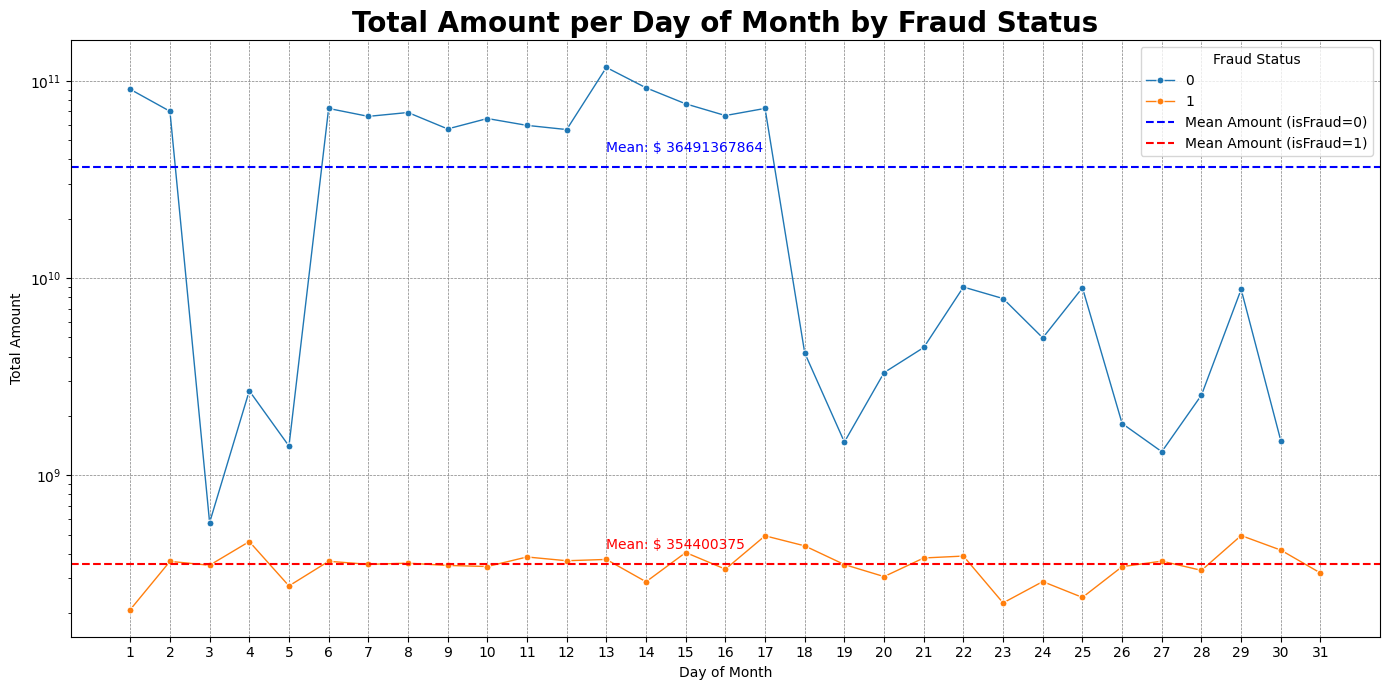

In [ ]:
df['date'] = pd.to_datetime(df['date'])

df['day_of_month'] = df['date'].dt.day # Extraer el día del mes
df_grouped = df.groupby(['day_of_month', 'isFraud'])['amount'].sum().reset_index()
mean_amounts = df_grouped.groupby('isFraud')['amount'].mean()

plt.figure(figsize=(14, 7))
sns.lineplot(data=df_grouped, x='day_of_month', y='amount', hue='isFraud', marker='o', markersize=5, linestyle='-', linewidth=1)

for isFraud_value, mean_amount in mean_amounts.items():
    if mean_amount>1e10:
      plt.axhline(mean_amount, linestyle='--', label=f'Mean Amount (isFraud={isFraud_value})', color='blue')
      plt.text(13, mean_amount*1.25, f'Mean: $ {mean_amount:.0f}', va='center', ha='left', fontsize=10, color='blue')
    else:
      plt.axhline(mean_amount, linestyle='--', label=f'Mean Amount (isFraud={isFraud_value})', color='red')
      plt.text(13, mean_amount*1.25, f'Mean: $ {mean_amount:.0f}', va='center', ha='left', fontsize=10, color='red')

plt.title('Total Amount per Day of Month by Fraud Status', fontsize=20, fontweight='bold')
plt.xlabel('Day of Month')
plt.ylabel('Total Amount')
plt.yscale('log')
plt.grid(True, linewidth=0.5, linestyle='--', color='gray')
plt.xticks(range(1, 32), rotation=0)
plt.legend(title='Fraud Status')
plt.tight_layout()
plt.show()


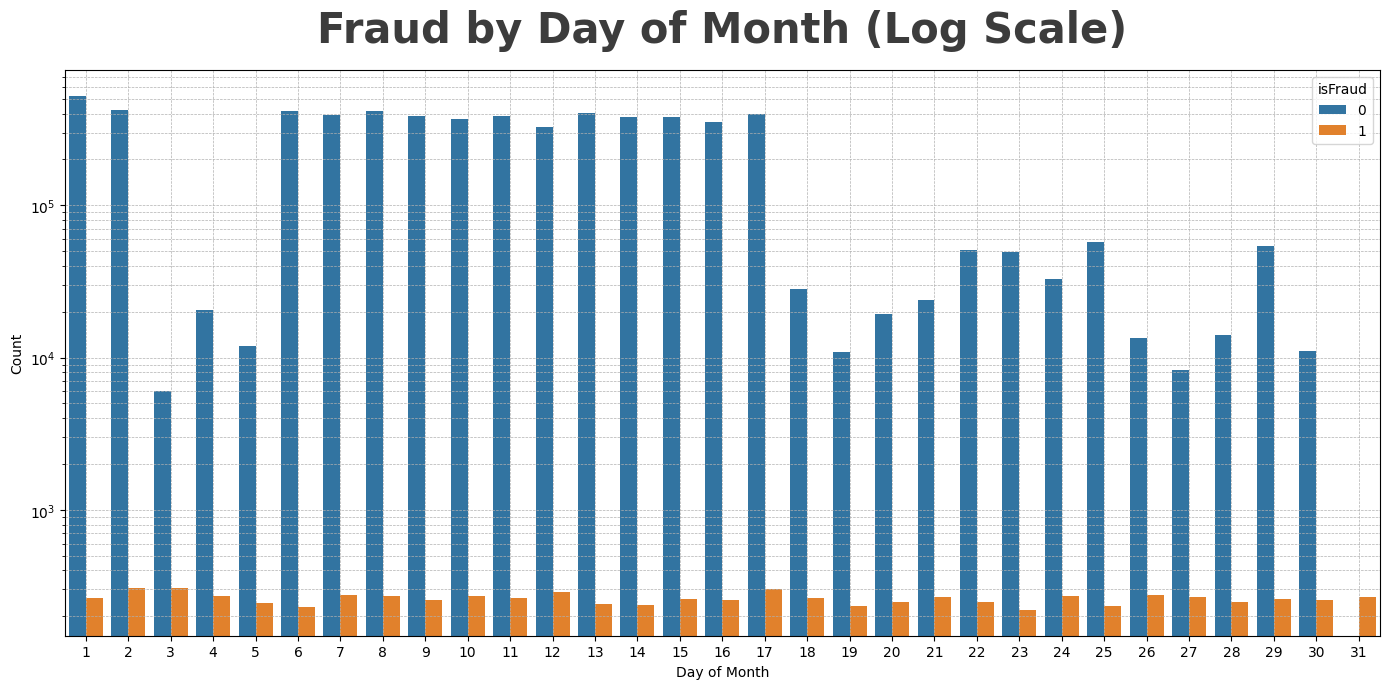

In [ ]:
# Gráfica de isFraud vs day_of_month
plt.figure(figsize=(14, 7))
ax1 = sns.countplot(x='day_of_month', hue='isFraud', data=df)#day_of_week
ax1.set_yscale('log')
plt.title('Fraud by Day of Month (Log Scale)',fontsize=30, fontweight='bold', color='#3c3c3c',pad=20)
plt.xlabel('Day of Month')
plt.ylabel('Count')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

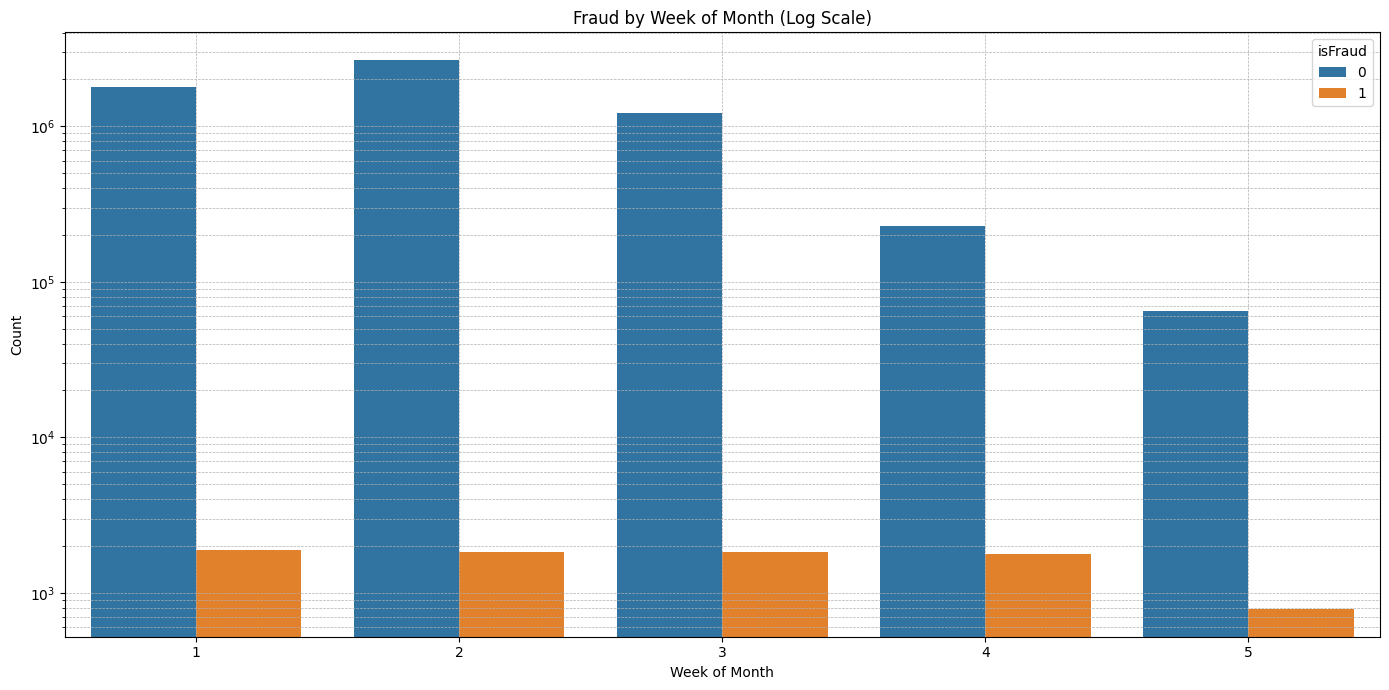

In [ ]:
# Gráfica de isFraud vs week_of_month
plt.figure(figsize=(14, 7))
ax2 = sns.countplot(x='week_of_month', hue='isFraud', data=df)
ax2.set_yscale('log')
plt.title('Fraud by Week of Month (Log Scale)')
plt.xlabel('Week of Month')
plt.ylabel('Count')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

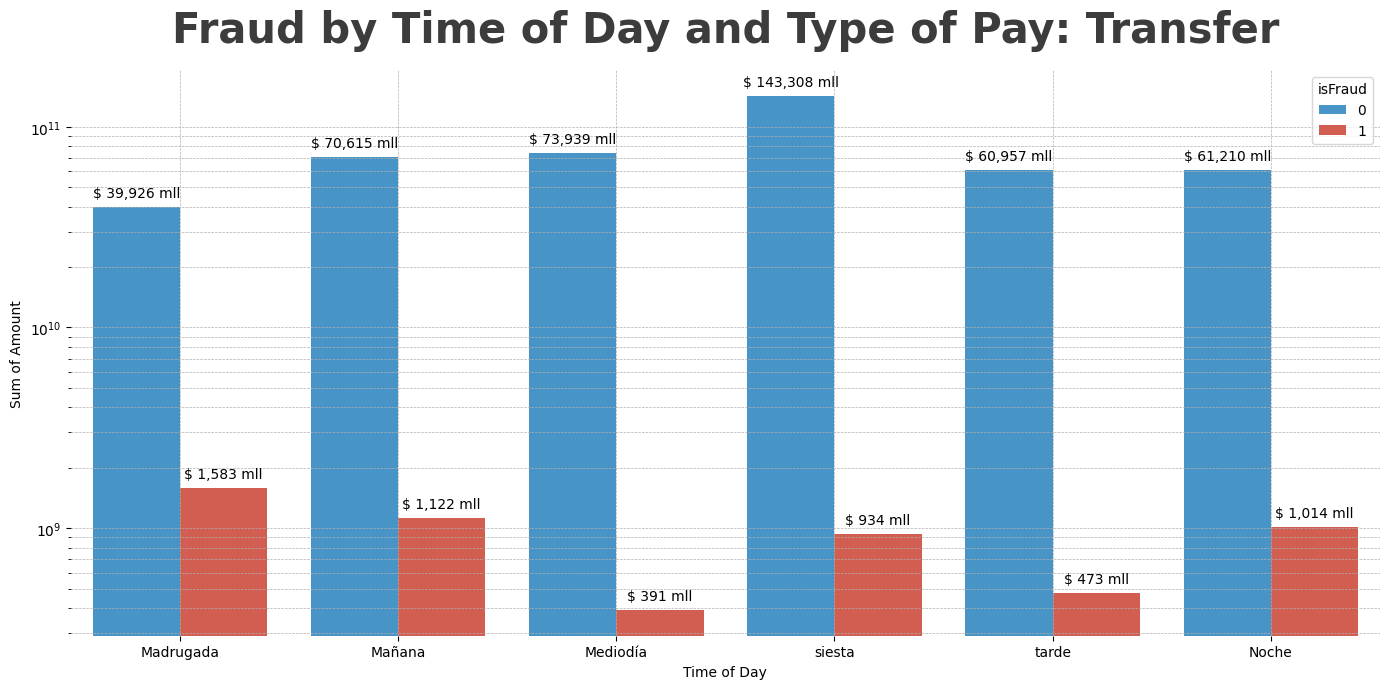

In [ ]:
df_0000 = df_categorical[df_categorical['type'] == 'TRANSFER']

# Agrupar por time_of_day e isFraud y calcular la suma de amount
df_grouped = df_0000.groupby(['time_of_day', 'isFraud'])['amount'].sum().reset_index()

# Orden específico para time_of_day
order = ['Madrugada', 'Mañana', 'Mediodía', 'siesta', 'tarde', 'Noche']

# Graficar
plt.figure(figsize=(14, 7))
ax = sns.barplot(x='time_of_day', y='amount', hue='isFraud', data=df_grouped, order=order, ci=None, palette=['#3498db', '#e74c3c'])

# Agregar los valores al final de las barras
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'$ {height/1e6:,.0f} mll',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 10),
                textcoords='offset points')

plt.title('Fraud by Time of Day and Type of Pay: Transfer',fontsize=30, fontweight='bold', color='#3c3c3c',pad=20)
plt.xlabel('Time of Day')
plt.ylabel('Sum of Amount')
plt.yscale('log')  # Aplicar escala logarítmica al eje y
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.box(None)
plt.show()


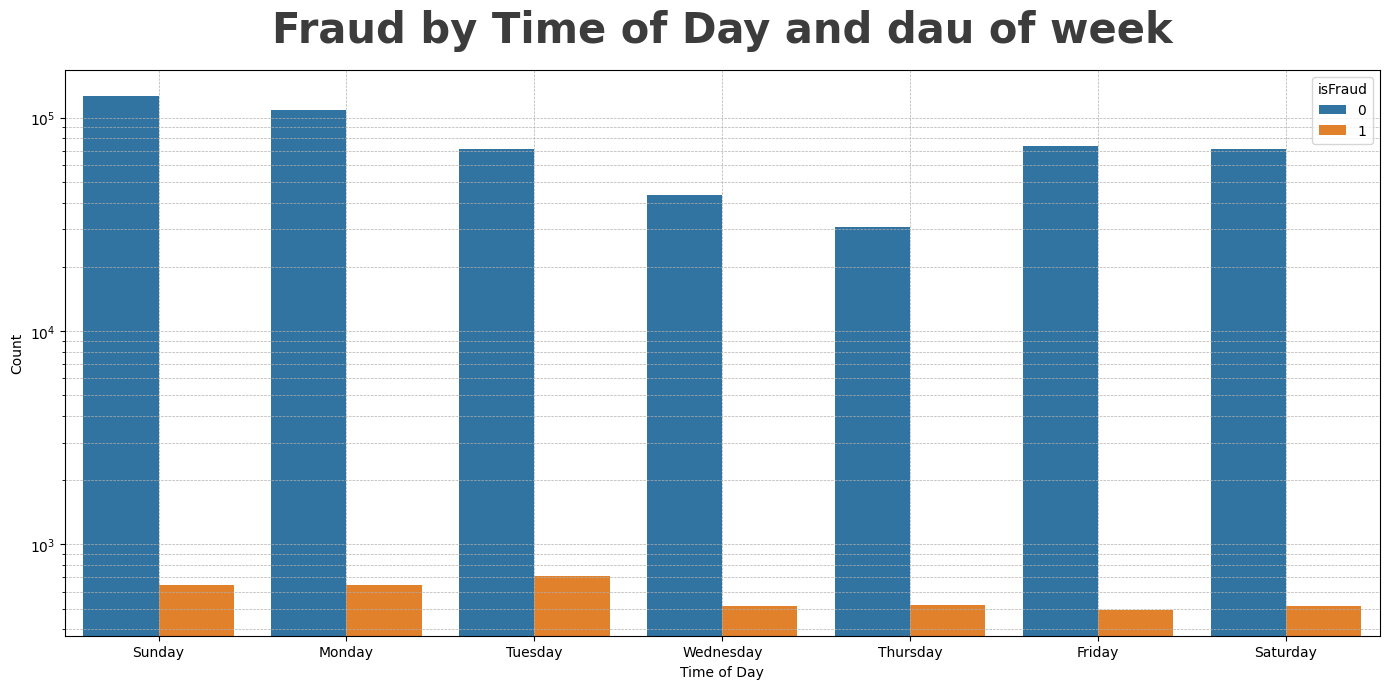

In [ ]:
df_00000=df_categorical[df_categorical['type']=='TRANSFER']#day_of_week
plt.figure(figsize=(14, 7))
ax = sns.countplot(x='day_of_week', hue='isFraud', data=df_00000)
ax.set_yscale('log')
plt.title('Fraud by Time of Day and dau of week',fontsize=30, fontweight='bold', color='#3c3c3c',pad=20)
plt.xlabel('Time of Day')
plt.ylabel('Count')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

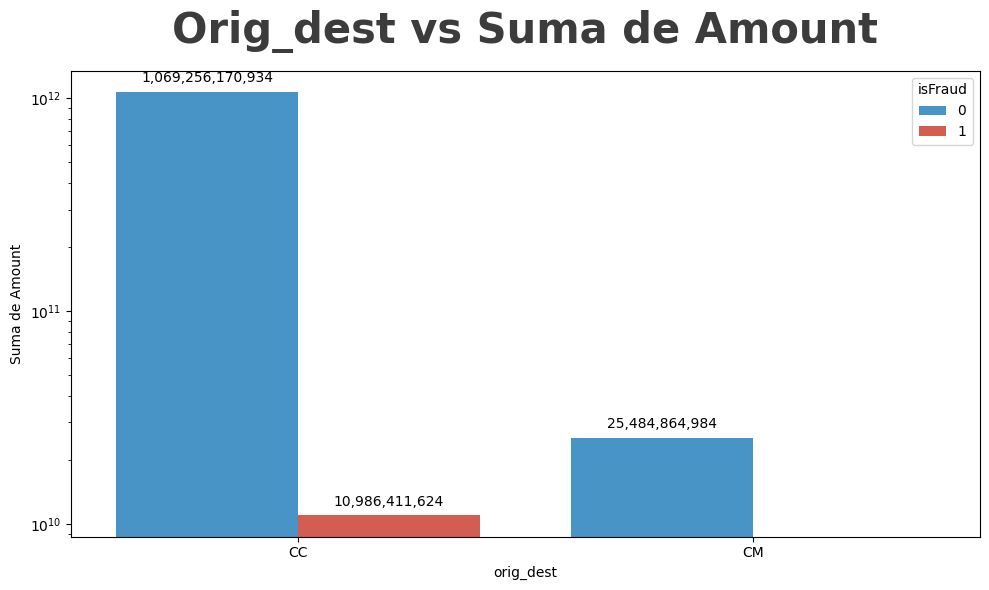

In [ ]:
df=df_categorical.copy()
df_grouped = df.groupby(['orig_dest', 'isFraud'])['amount'].sum().reset_index()

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='orig_dest', y='amount', hue='isFraud', data=df_grouped, ci=None, palette=['#3498db', '#e74c3c'])

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:,.0f}',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 10),
                textcoords='offset points')

plt.title('Orig_dest vs Suma de Amount',fontsize=30, fontweight='bold', color='#3c3c3c',pad=20)
plt.ylabel('Suma de Amount')
plt.yscale('log')  # Aplicar escala logarítmica al eje y
plt.tight_layout()
plt.show()


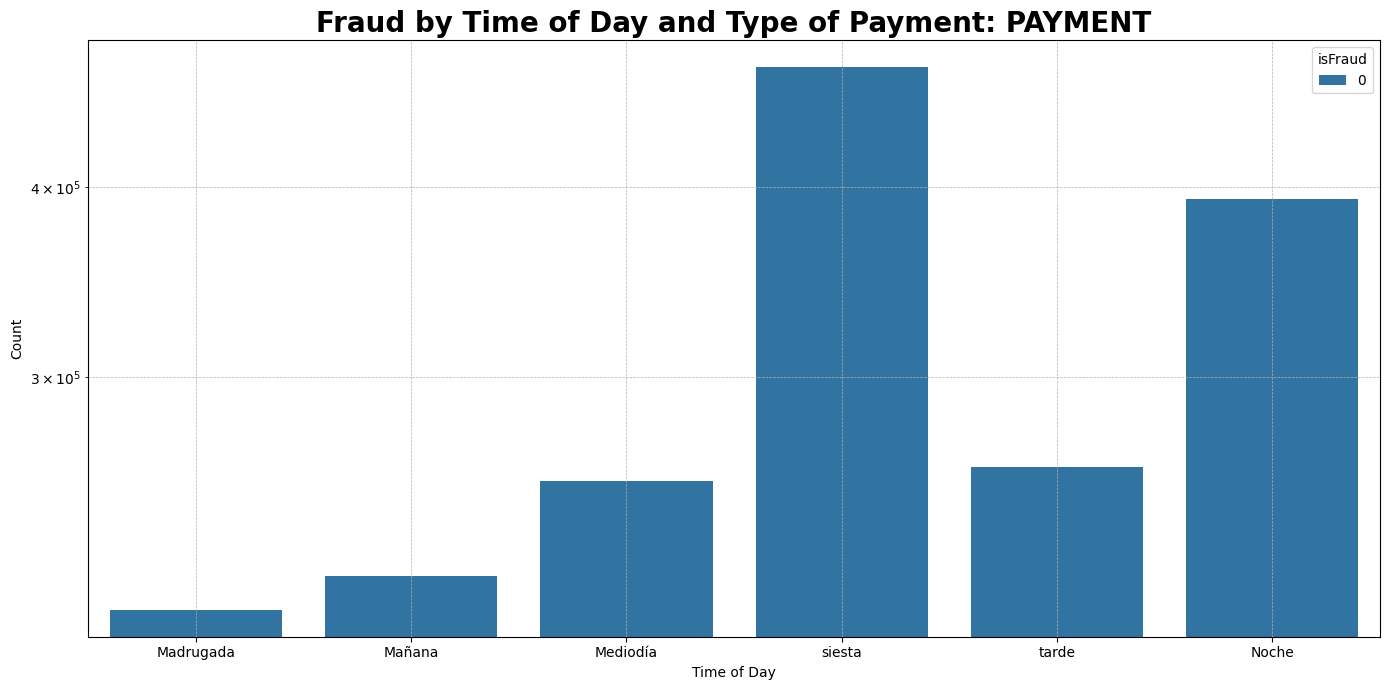

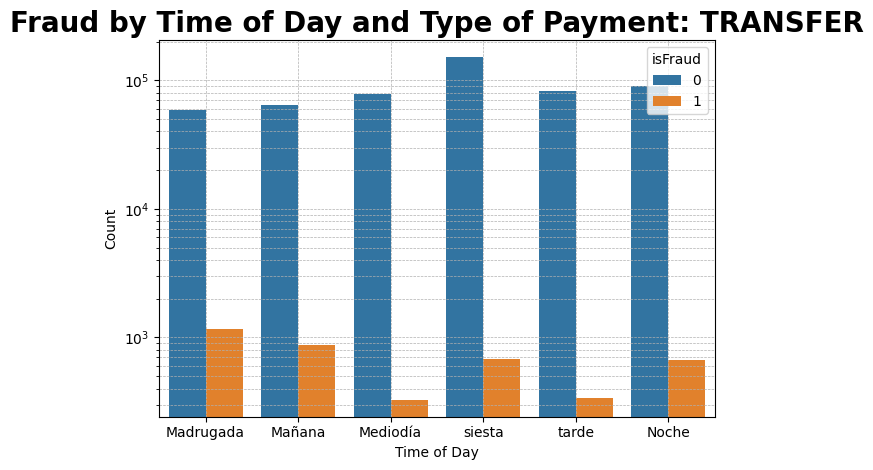

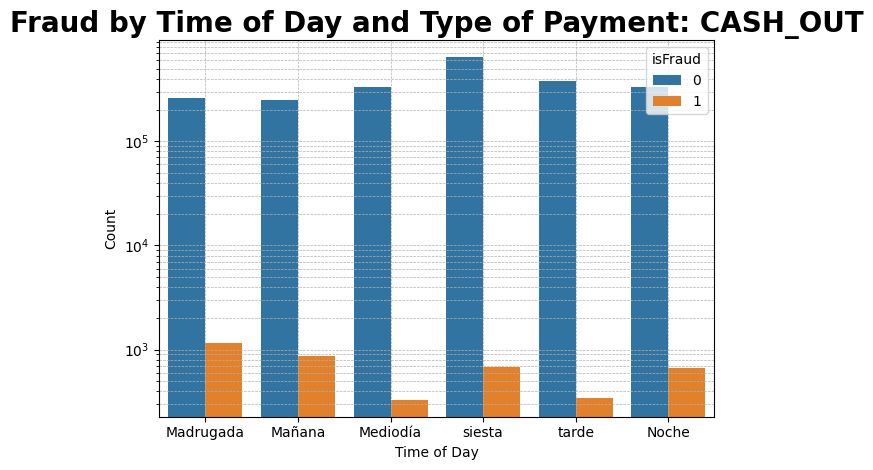

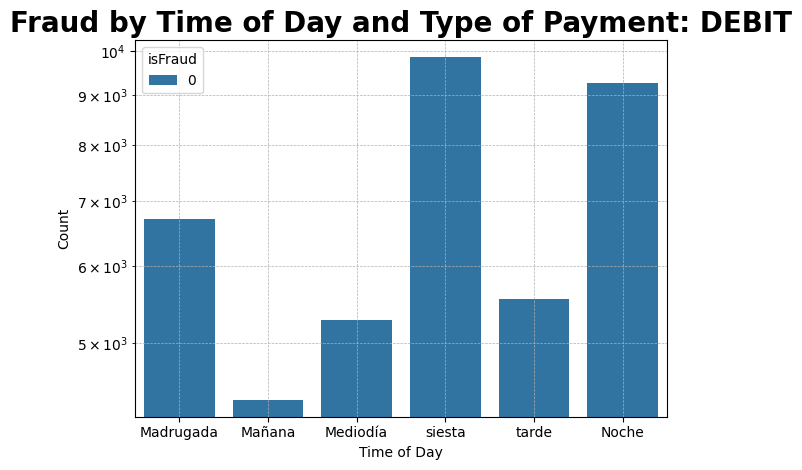

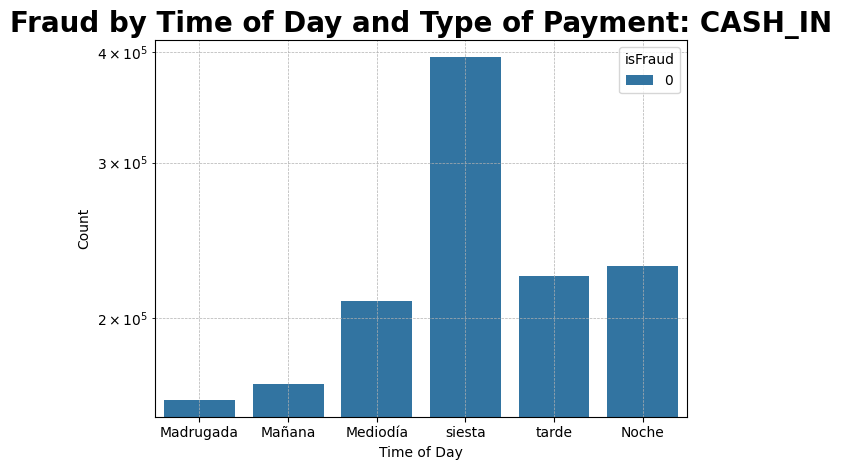

In [ ]:
df=df_categorical.copy()

type_values = df_categorical['type'].unique()

plt.figure(figsize=(14, 7))

for type_value in type_values:
    df_type = df_categorical[df_categorical['type'] == type_value]
    ax = sns.countplot(x='time_of_day', hue='isFraud', data=df_type, order=['Madrugada', 'Mañana', 'Mediodía', 'siesta', 'tarde', 'Noche'])
    ax.set_yscale('log')
    plt.title(f'Fraud by Time of Day and Type of Payment: {type_value}', fontsize=20, fontweight='bold')
    plt.xlabel('Time of Day')
    plt.ylabel('Count')
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.tight_layout()
    plt.show()


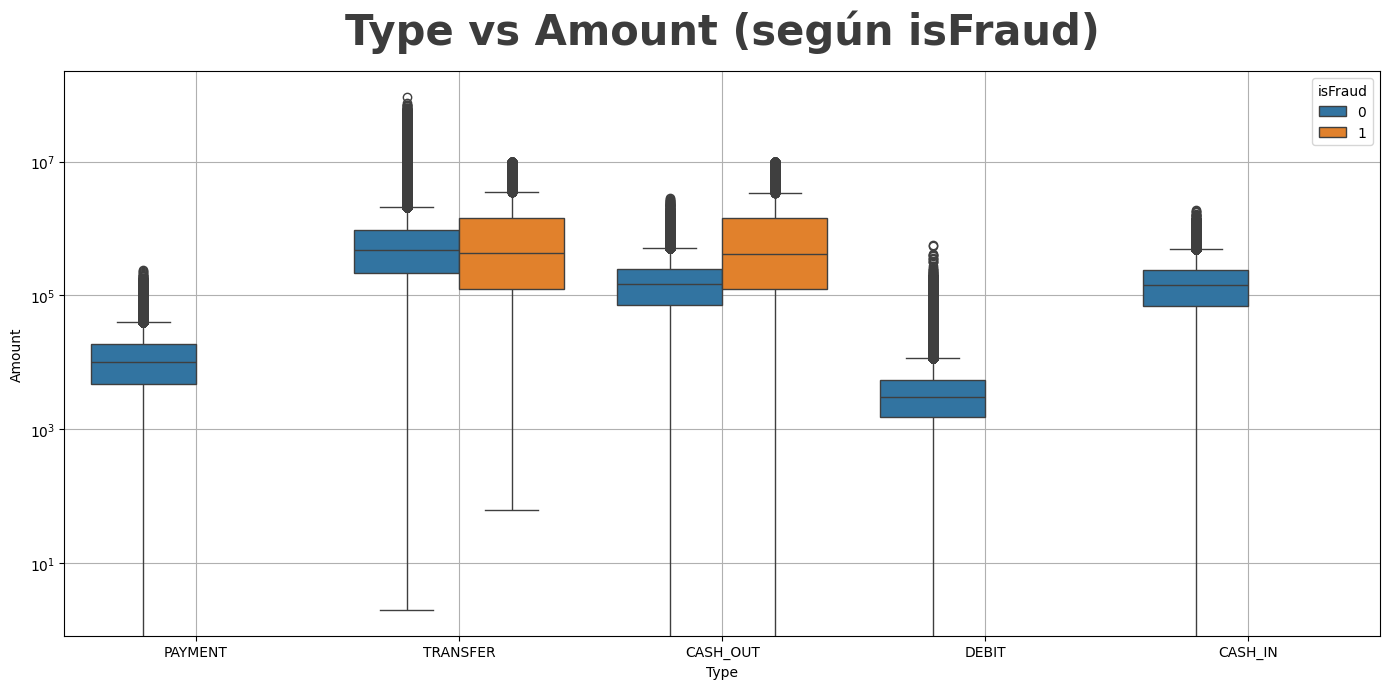

In [ ]:
df=df_categorical.copy()

plt.figure(figsize=(14, 7))
sns.boxplot(x='type', y='amount', hue='isFraud', data=df)
plt.yscale('log')  # Escala logarítmica en el eje y
plt.title('Type vs Amount (según isFraud)',fontsize=30, fontweight='bold', color='#3c3c3c',pad=20)
plt.xlabel('Type')
plt.ylabel('Amount')
plt.grid(True)
plt.tight_layout()
plt.show()

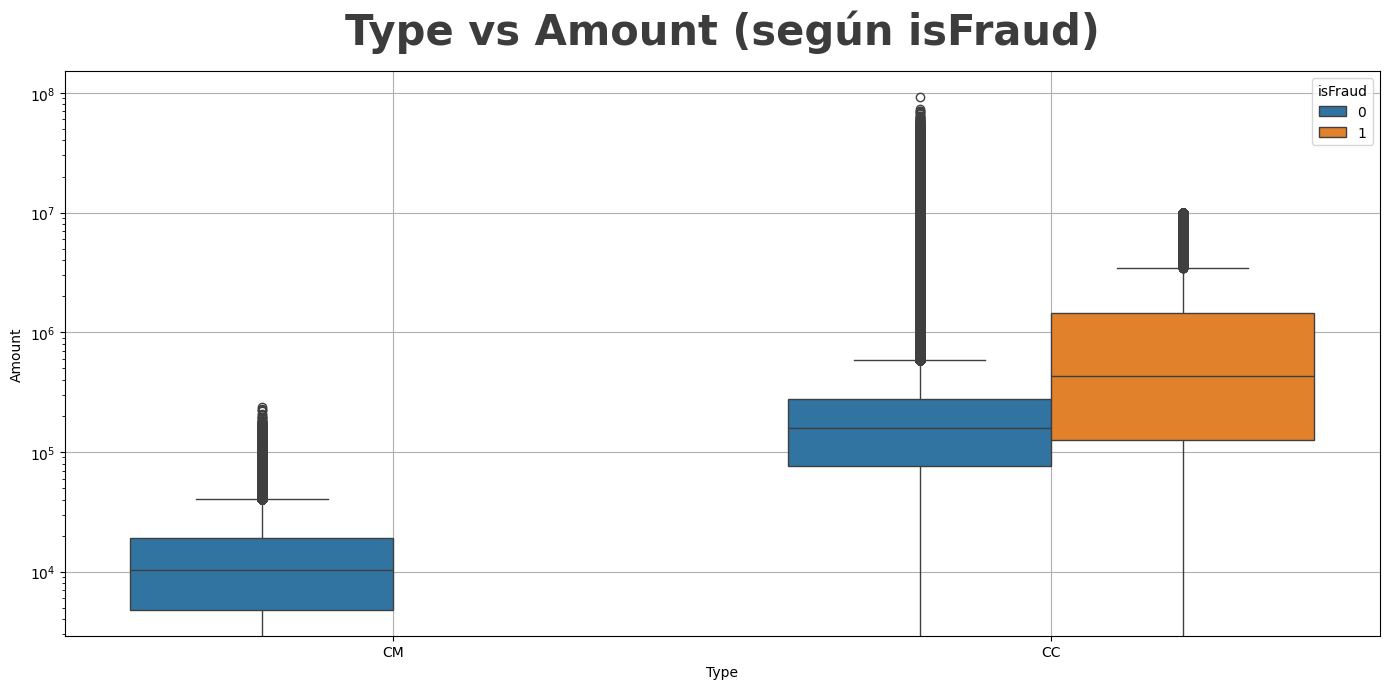

In [ ]:
df=df_categorical.copy()

plt.figure(figsize=(14, 7))
sns.boxplot(x='orig_dest', y='amount', hue='isFraud', data=df)
plt.yscale('log')  # Escala logarítmica en el eje y
plt.title('Type vs Amount (según isFraud)',fontsize=30, fontweight='bold', color='#3c3c3c',pad=20)
plt.xlabel('Type')
plt.ylabel('Amount')
plt.grid(True)
plt.tight_layout()
plt.show()

* PAYMENT (Pago): Una transacción en la que se envía dinero de una cuenta a otra, generalmente para pagar por bienes o servicios.

* TRANSFER (Transferencia): Una transacción en la que se mueve dinero de una cuenta a otra, generalmente entre cuentas pertenecientes al mismo titular o a titulares relacionados.

* CASH_OUT (Retiro): Una transacción en la que se retira dinero en efectivo de una cuenta, convirtiéndolo en efectivo físico.

* DEBIT (Débito): Una transacción en la que se deduce dinero directamente de una cuenta para pagar una compra o servicio.

* CASH_IN (Depósito): Una transacción en la que se deposita dinero en una cuenta, generalmente en forma de efectivo físico.

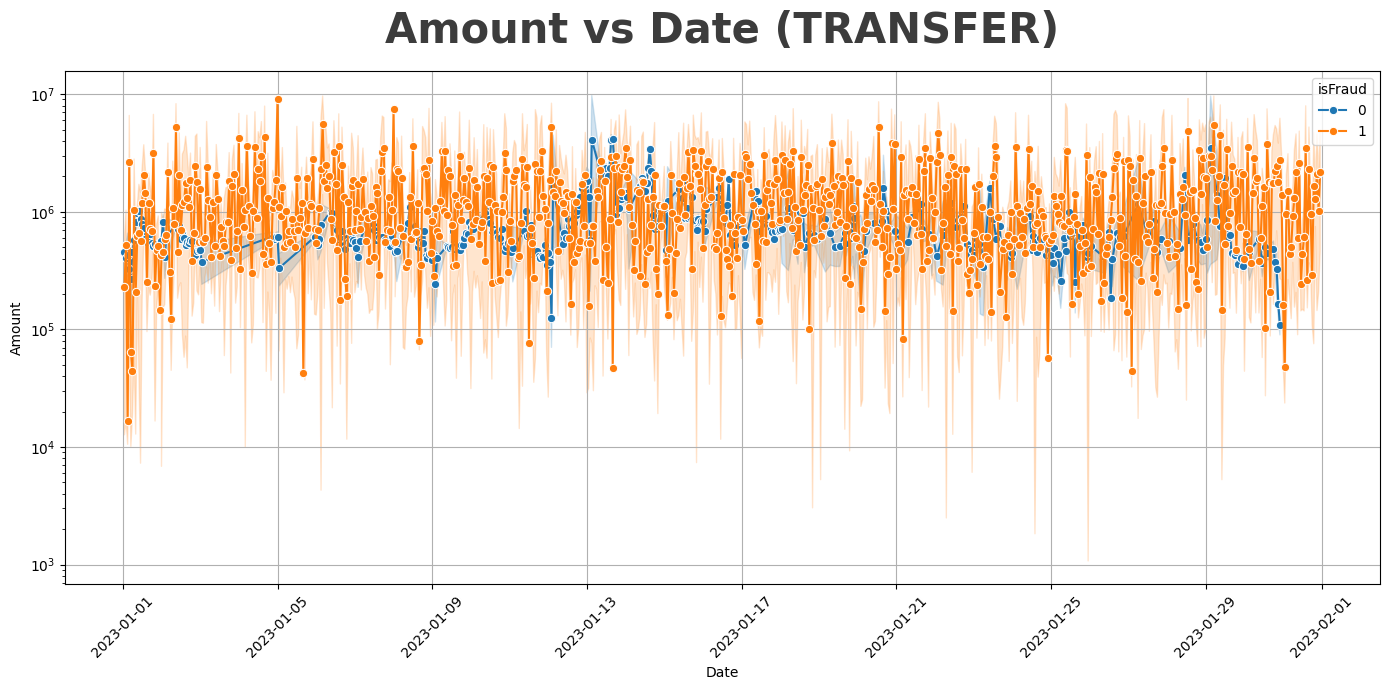

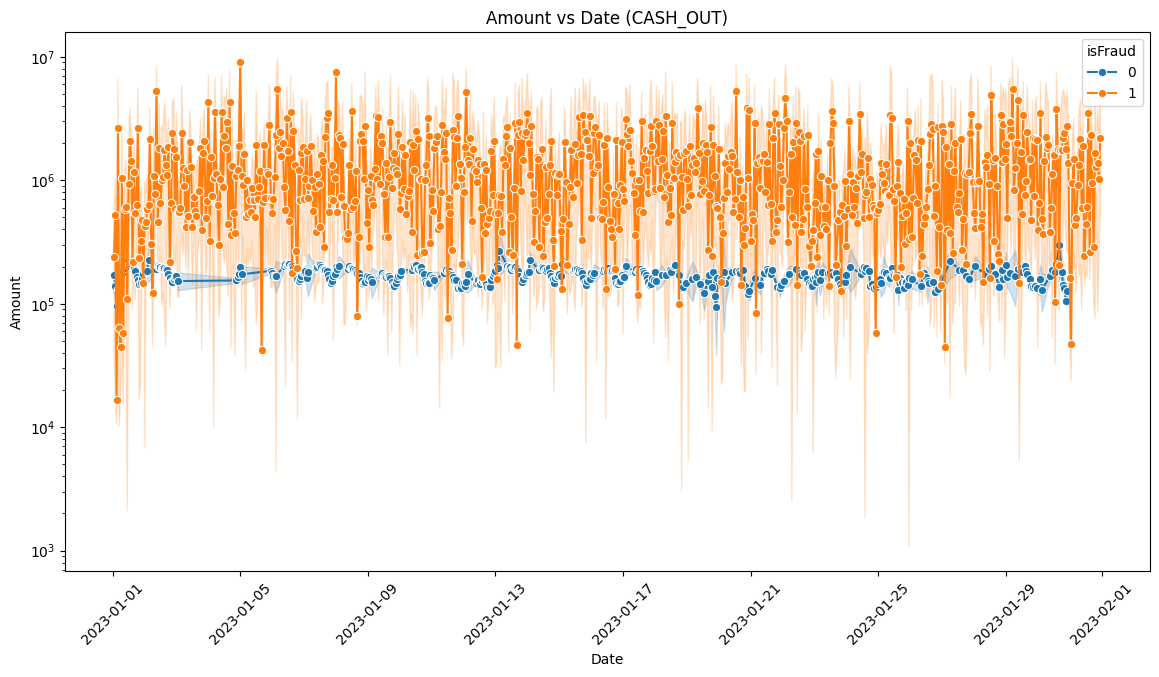

In [ ]:
# Graficar para las transacciones de tipo TRANSFER

df=df_categorical.copy()
df_transfer = df[df['type'] == 'TRANSFER']

plt.figure(figsize=(14, 7))
ax=sns.lineplot(x='date', y='amount', hue='isFraud', data=df_transfer, marker='o', linestyle='-')
plt.title('Amount vs Date (TRANSFER)',fontsize=30, fontweight='bold', color='#3c3c3c',pad=20)
ax.set_yscale('log')
plt.xlabel('Date')
plt.ylabel('Amount')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend(title='isFraud')
plt.tight_layout()
plt.show()

df_cash_out = df[df['type'] == 'CASH_OUT']

plt.figure(figsize=(14, 7))
ax=sns.lineplot(x='date', y='amount', hue='isFraud', data=df_cash_out, marker='o', linestyle='-', palette='tab10')
plt.title('Amount vs Date (CASH_OUT)')
ax.set_yscale('log')

plt.xlabel('Date')
plt.ylabel('Amount')
plt.xticks(rotation=45)
plt.legend(title='isFraud')
plt.show()


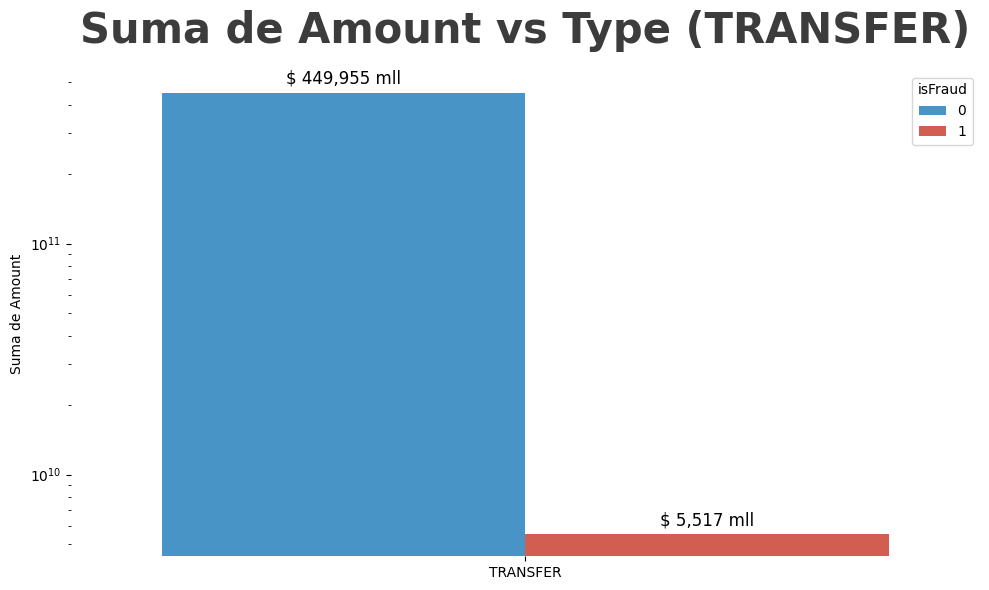

In [ ]:
df=df_categorical.copy()
df_transfer = df[df['type'] == 'TRANSFER']
df_transfer_grouped = df_transfer.groupby(['type', 'isFraud'])['amount'].sum().reset_index()

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='type', y='amount', hue='isFraud', data=df_transfer_grouped, ci=None, palette=['#3498db', '#e74c3c'])

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'$ {height/1e6:,.0f} mll',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 10),
                textcoords='offset points',fontsize=12)

plt.title('Suma de Amount vs Type (TRANSFER)',fontsize=30, fontweight='bold', color='#3c3c3c',pad=20)
plt.xlabel('')
plt.ylabel('Suma de Amount')
plt.yscale('log')
plt.tight_layout()
plt.box(None)
plt.show()

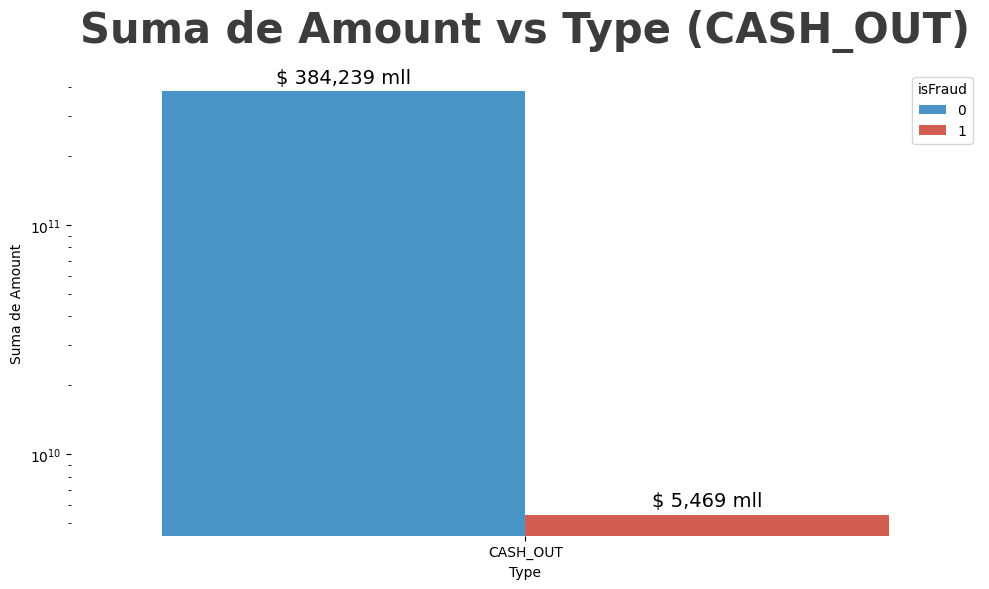

In [ ]:
df=df_categorical.copy()
df_cash_out = df[df['type'] == 'CASH_OUT']

df_cash_out_grouped = df_cash_out.groupby(['type', 'isFraud'])['amount'].sum().reset_index()

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='type', y='amount', hue='isFraud', data=df_cash_out_grouped, ci=None, palette=['#3498db', '#e74c3c'])

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'$ {height/1e6:,.0f} mll',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 10),
                textcoords='offset points',fontsize=14)

plt.title('Suma de Amount vs Type (CASH_OUT)',fontsize=30, fontweight='bold', color='#3c3c3c',pad=20)
plt.xlabel('Type')
plt.ylabel('Suma de Amount')
plt.yscale('log')
plt.tight_layout()
plt.box(None)
plt.show()

In [ ]:
df_categorical.orig_dest.unique()

array(['CM', 'CC'], dtype=object)

In [ ]:
df_grouped = df.groupby(['orig_dest', 'isFraud'])['amount'].sum().reset_index()

df_grouped

,orig_dest,isFraud,amount
0,CC,0,1069256170934
1,CC,1,10986411624
2,CM,0,25484864984


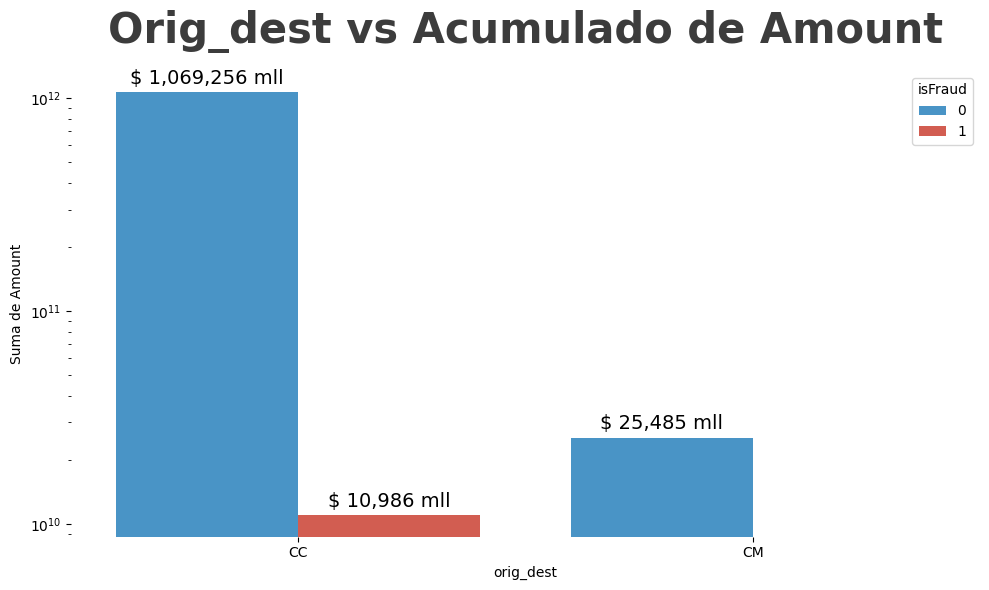

In [ ]:
df=df_categorical.copy()
df_grouped = df.groupby(['orig_dest', 'isFraud'])['amount'].sum().reset_index()

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='orig_dest', y='amount', hue='isFraud', data=df_grouped, ci=None, palette=['#3498db', '#e74c3c'])

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'$ {height/1e6:,.0f} mll',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 10),
                textcoords='offset points',fontsize=14)

plt.title('Orig_dest vs Acumulado de Amount',fontsize=30, fontweight='bold', color='#3c3c3c',pad=20)
plt.ylabel('Suma de Amount')
plt.yscale('log')
plt.tight_layout()
plt.box(None)
plt.show()


### df_limited: se filtraron los datos distintos de type=TRANSFER , type=CASH_OUT y orig_dest=CC

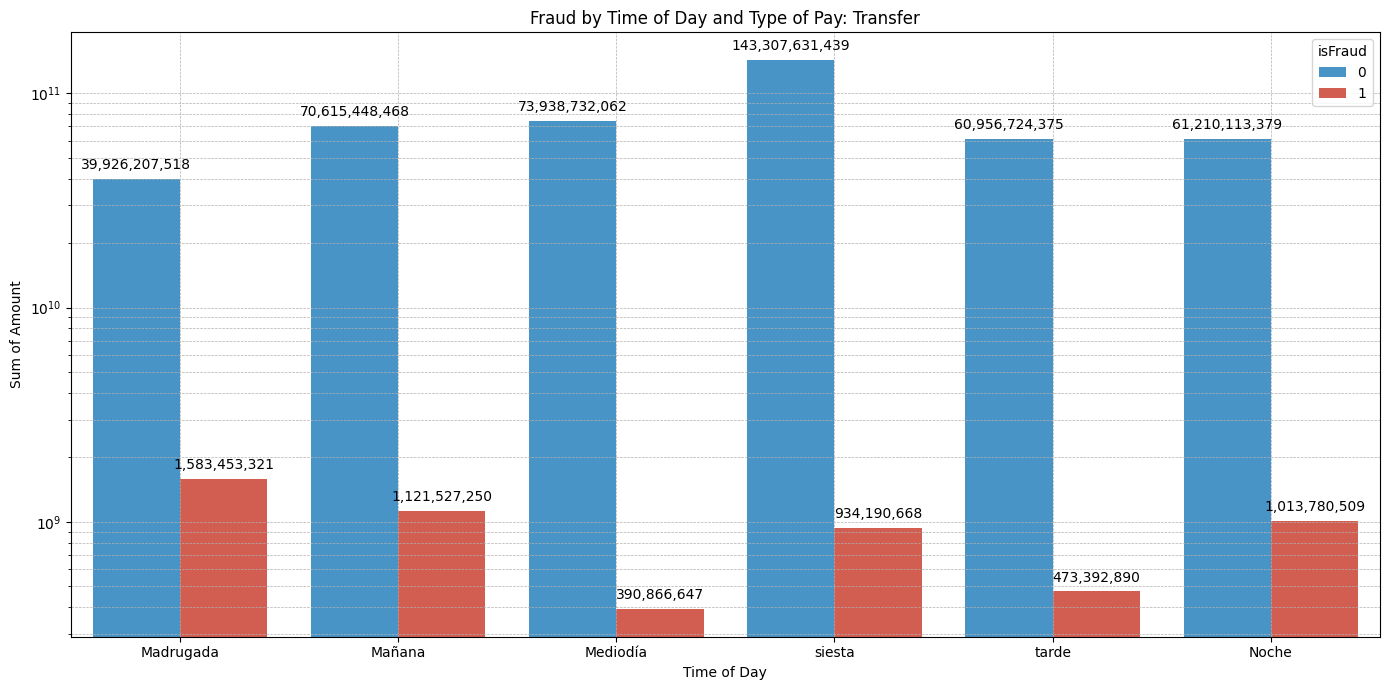

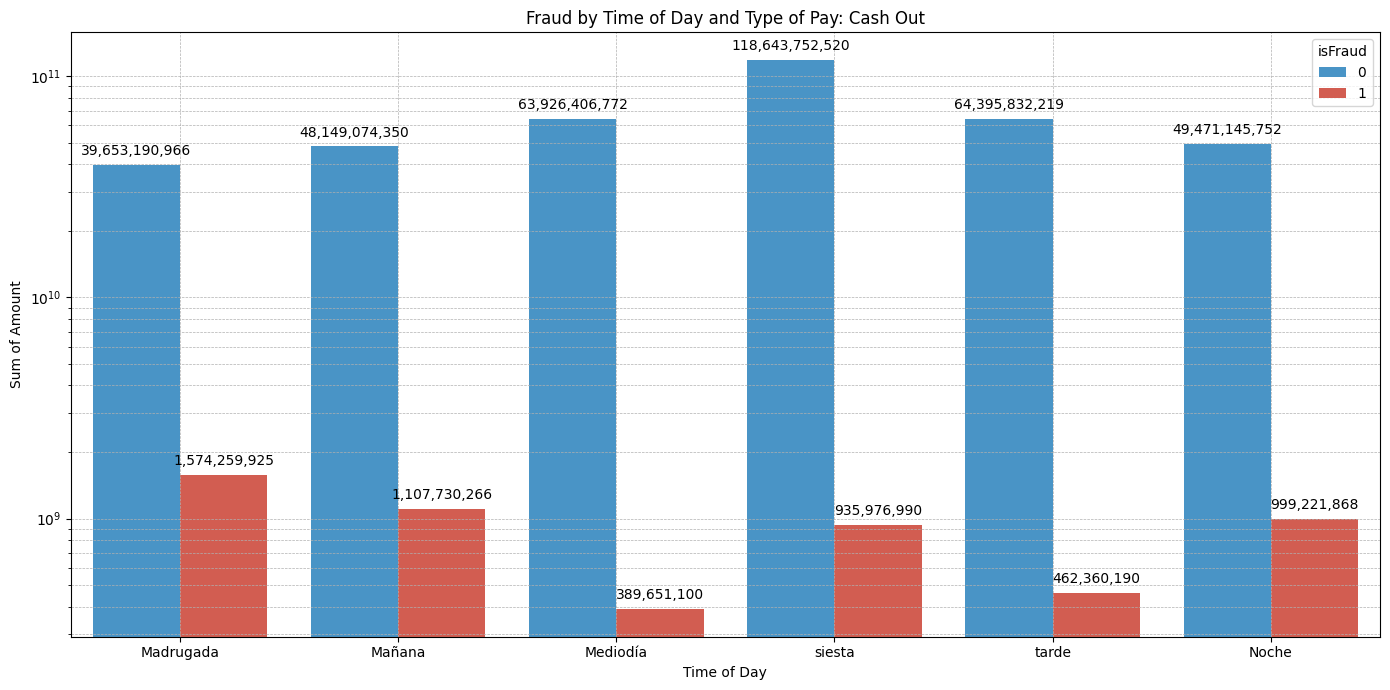

In [ ]:
# Graficar: Fraud by Time of Day and Type of Pay: TRANSFER

df_limited = df_categorical[(df_categorical['orig_dest'] == 'CC') & (df_categorical['type'].isin(['TRANSFER', 'CASH_OUT']))]

df_grouped = df_limited.groupby(['time_of_day', 'isFraud', 'type'])['amount'].sum().reset_index()

order = ['Madrugada', 'Mañana', 'Mediodía', 'siesta', 'tarde', 'Noche']

plt.figure(figsize=(14, 7))
ax = sns.barplot(x='time_of_day', y='amount', hue='isFraud', data=df_grouped[df_grouped['type'] == 'TRANSFER'], order=order, ci=None, palette=['#3498db', '#e74c3c'])

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:,.0f}',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 10),
                textcoords='offset points')

plt.title('Fraud by Time of Day and Type of Pay: Transfer')
plt.xlabel('Time of Day')
plt.ylabel('Sum of Amount')
plt.yscale('log')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

# Graficar: Fraud by Time of Day and Type of Pay: CASH_OUT
plt.figure(figsize=(14, 7))
ax = sns.barplot(x='time_of_day', y='amount', hue='isFraud', data=df_grouped[df_grouped['type'] == 'CASH_OUT'], order=order, ci=None, palette=['#3498db', '#e74c3c'])

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:,.0f}',
                (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', xytext=(0, 10),
                textcoords='offset points')

plt.title('Fraud by Time of Day and Type of Pay: Cash Out')
plt.xlabel('Time of Day')
plt.ylabel('Sum of Amount')
plt.yscale('log')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()



### Analizando el target:

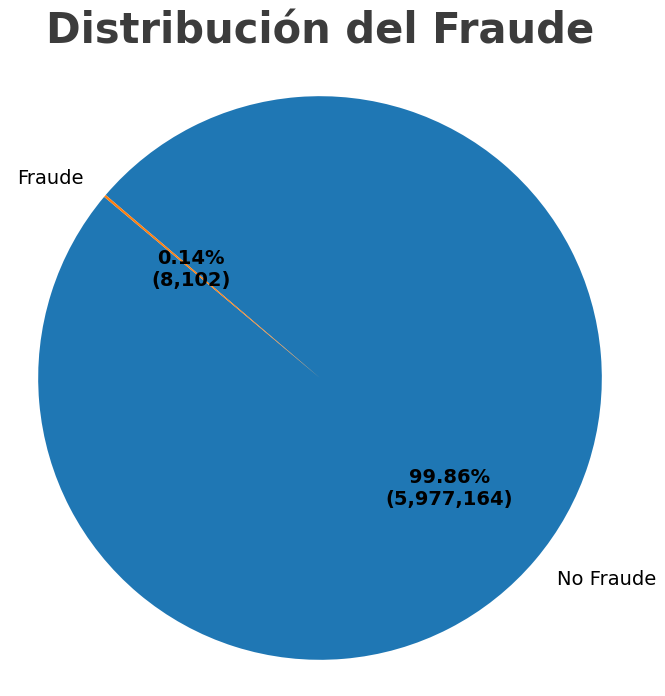

In [ ]:
fraud_counts = df['isFraud'].value_counts()

labels = ['No Fraude', 'Fraude']
colors = ['#1f77b4', '#ff7f0e']

def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(pct * total / 100.0)
        return f'{pct:.2f}%\n({val:,})'
    return my_format

plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(fraud_counts, labels=labels, colors=colors, autopct=autopct_format(fraud_counts), startangle=140, textprops={'fontsize': 14})

for autotext in autotexts:
    autotext.set_fontsize(14)
    autotext.set_fontweight('bold')

plt.title('Distribución del Fraude', fontsize=30, fontweight='bold', color='#3c3c3c', pad=20)
plt.axis('equal')
plt.show()


In [ ]:
fraud_amount = df[df['isFraud'] == 1]['amount'].sum()
non_fraud_amount = df[df['isFraud'] == 0]['amount'].sum()
print('fraud_amount: ',fraud_amount)
print('non_fraud_amount: ',non_fraud_amount)

fraud_amount:  10986411624
non_fraud_amount:  1094741035918


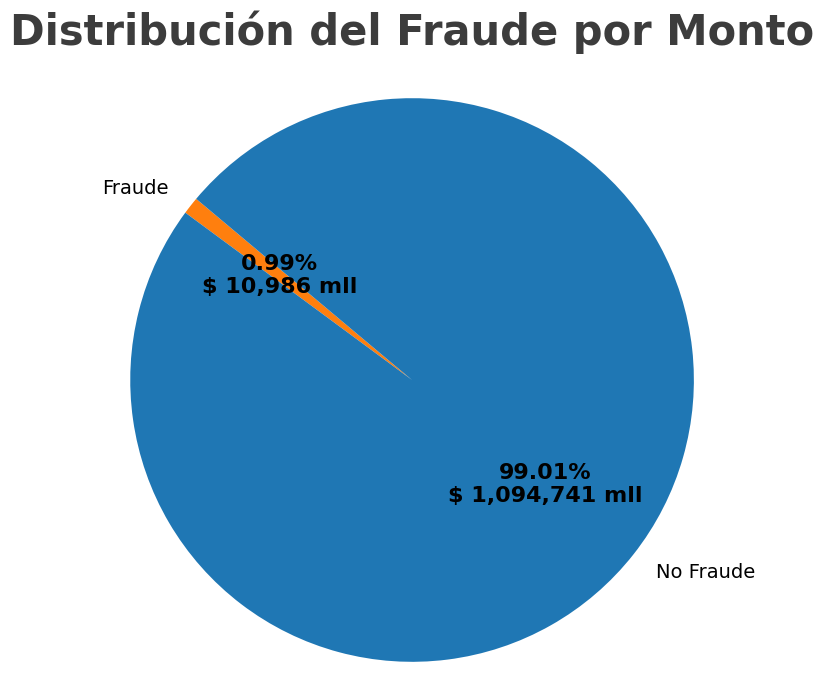

In [ ]:
import matplotlib.pyplot as plt

# Calcular los montos totales de fraude y no fraude
fraud_amount = df[df['isFraud'] == 1]['amount'].sum()
non_fraud_amount = df[df['isFraud'] == 0]['amount'].sum()

# Etiquetas y datos para el gráfico de pastel
labels = ['Fraude', 'No Fraude']
amounts = [fraud_amount, non_fraud_amount]
colors = ['#ff7f0e', '#1f77b4']

# Función para mostrar porcentaje y monto
def autopct_format(values):
    def my_format(pct):
        total = sum(values)
        val = int(pct * total / 100.0)
        return f'{pct:.2f}%\n$ {int(val/1e6):,} mll'
    return my_format

plt.figure(figsize=(8, 8))
wedges, texts, autotexts = plt.pie(amounts, labels=labels, colors=colors, autopct=autopct_format(amounts), startangle=140, textprops={'fontsize': 14})

for autotext in autotexts:
    autotext.set_fontsize(16)
    autotext.set_fontweight('bold')

plt.title('Distribución del Fraude por Monto', fontsize=30, fontweight='bold', color='#3c3c3c', pad=20)
plt.axis('equal')
plt.show()


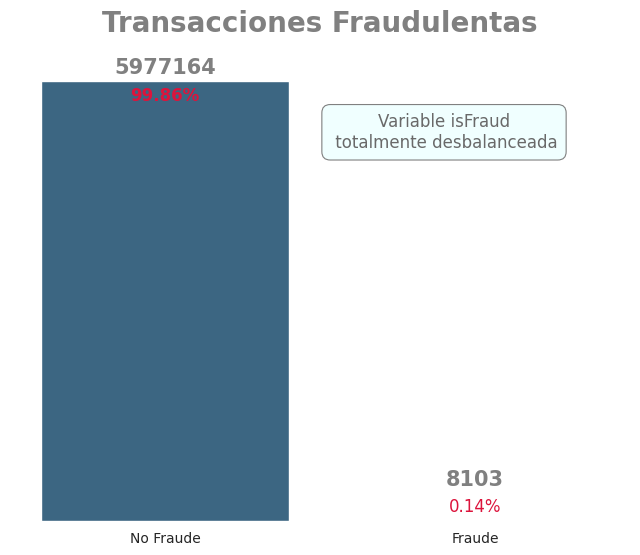

In [ ]:
def graf_isFraud(text_boxplot,df_banco_bigdata):
  plt.figure(figsize=(8,6),facecolor='none')
  sns.set_style("whitegrid")
  ax = sns.countplot(data=df_banco_bigdata, x='isFraud', palette="viridis")

  # Personalizar el gráfico
  ax.set_title("Transacciones Fraudulentas", fontsize=20,color='gray',pad=20,fontweight='bold')
  ax.set_xlabel("")
  ax.set_ylabel("")
  ax.set_xticklabels(["No Fraude", "Fraude"])
  ax.tick_params(top=False, right=False)
  total=len(df_banco_bigdata)

  for p in ax.patches:
    if p.get_height()>1e6:
      ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points', color='gray', fontweight='bold', fontsize=15)
      ax.annotate(f'{p.get_height()/total:.2%}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, -10), textcoords='offset points', color='crimson', fontweight='bold', fontsize=12)
    else:
      ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 30), textcoords='offset points', color='gray', fontweight='bold', fontsize=15)
      ax.annotate(f'{p.get_height()/total:.2%}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points', color='crimson', fontsize=12)

  ax.annotate(text_boxplot, xy=(0.7, 0.8), xycoords='axes fraction', ha='center', va='bottom',
          bbox=dict(boxstyle='round,pad=.5', fc='azure', ec='gray', lw=.8), fontsize=12, color='dimgray')

  ax.set_yticks([])
  ax.xaxis.grid(False)
  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)
  ax.spines['left'].set_visible(False)
  ax.spines['bottom'].set_visible(False)
  plt.show()

text_boxplot='Variable isFraud\n totalmente desbalanceada'
graf_isFraud(text_boxplot,df_banco_bigdata)

In [ ]:
df_banco_bigdata.drop(columns='day_of_month', inplace=True)

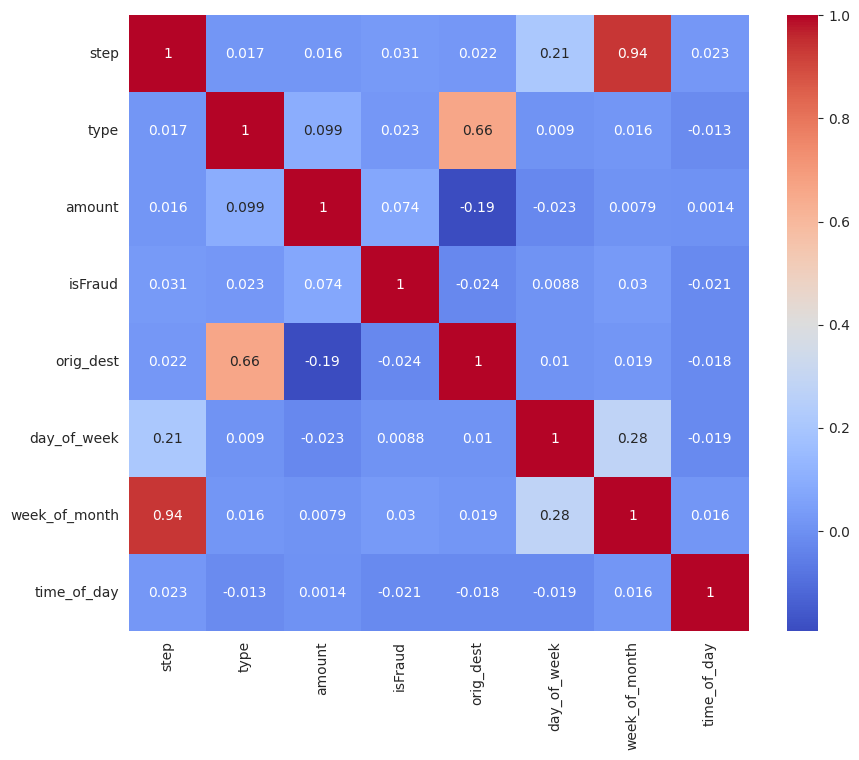

In [ ]:
def matriz_corr(df):
  # df=df[['isFraud','step', 'type', 'amount', 'orig_dest', 'day_of_week',
  #      'week_of_month', 'day_of_month', 'time_of_day']]
  numeric_cols = df.select_dtypes(include=['number']).columns
  corr_matrix = df[numeric_cols].corr()

  plt.figure(figsize=(10,8))
  sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
  plt.show()
matriz_corr(df_banco_bigdata)

In [ ]:
# df_banco_bigdata.drop(columns='day_of_month', inplace=True)

## 3.5 Balanceo de datos: Variable objetivo 'isFraud'

### Oversample para balanceo de la clase minoritaria:

In [ ]:
# from imblearn.over_sampling import RandomOverSampler

# # Separar características y variable objetivo
# X_combined = df_banco_bigdata.drop(columns=['isFraud'])
# y_combined = df_banco_bigdata['isFraud']

# #Aumentar el porcentaje en:
# porcentaje_up=.1

# # Oversample la clase minoritaria usando RandomOverSampler
# ros = RandomOverSampler(sampling_strategy=porcentaje_up, random_state=42)
# X_resampled, y_resampled = ros.fit_resample(X_combined, y_combined)

# # Combinar los datos resampleados en un solo DataFrame
# df_balanced_resampled = pd.concat([X_resampled, y_resampled], axis=1)

# # Verificar el balance de clases
# df_balanced_resampled['isFraud'].value_counts()

In [ ]:
# graf_isFraud("BALANCEO\n------------------\nClase Fraude\nserá un 10%\n de no Fraude",df_balanced_resampled)

#**4. Construcción de Modelos**

Modelos:
* Random Forest.
* SVG

Métricas: **Accuracy, Precision, Recall, F1-score y AUC-ROC.**

Creamos una función que cree, entrene y evalue los modelos.

In [ ]:
# ## Separando nuestros datos en prueba y entrenamiento
# df_balanced_resampled=df_balanced_resampled.copy()

# y = df_balanced_resampled['isFraud']
# x = df_balanced_resampled.drop(columns='isFraud')
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state = 42)

### Estandarizar modelos

In [ ]:
# from sklearn.preprocessing import StandardScaler

# ## Estandarizando los datos de entrenamiento
# standarscaler = StandardScaler()
# standarscaler.fit(x_train)
# ## Datos de entrenamiento escalados
# x_train_scaled = standarscaler.transform(x_train)
# x_test_scaled = standarscaler.transform(x_test)

In [ ]:
# import time
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
# from datetime import timedelta

# # Crear el modelo
# rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# # Medir el tiempo de entrenamiento
# start_time = time.time()
# star = str(timedelta(seconds=int(start_time)))
# print(f"Inicio: {star}")

# rf_model.fit(x_train_scaled, y_train)
# end_time = time.time()
# training_time = end_time - start_time

# # Medir el tiempo de predicción
# start_time = time.time()
# y_pred = rf_model.predict(x_test_scaled)
# end_time = time.time()
# end = str(timedelta(seconds=int(end_time)))
# print(f"Inicio: {end}")
# prediction_time = end_time - start_time

# # Evaluar el modelo
# accuracy = accuracy_score(y_test, y_pred)
# conf_matrix = confusion_matrix(y_test, y_pred)
# class_report = classification_report(y_test, y_pred)

# # Convertir el tiempo a formato hh:mm:ss
# training_time_str = str(timedelta(seconds=int(training_time)))
# prediction_time_str = str(timedelta(seconds=int(prediction_time)))

# # Mostrar resultados
# print(f"Training Time: {training_time_str}")
# print(f"Prediction Time: {prediction_time_str}")
# print(f"Accuracy: {accuracy}")
# print(f"Confusion Matrix:\n{conf_matrix}")
# print(f"Classification Report:\n{class_report}")


## Primer modelo con RandomForestClassifier:
* Se entrenó con df_fitered el en cual se eliminarion las variables categóricas distintas a type=TRANSFER, type=CASH_OUT y orig_dest=CC. Por lo que el tamaño del dataset se redujo más del 50%.
* Luego hice oversampling con isFraud=1 aumentando un 3% del total de isFraud=0.

In [ ]:
# Crear un nuevo dataset sólo con las categorías type=TRANSFER, TYPE=CASH_OUT Y orig_dest=CC

df_filtered = df_categorical[(df_categorical['orig_dest'] == 'CC') & (df_categorical['type'].isin(['TRANSFER', 'CASH_OUT']))]
df_filtered.drop(columns='date',inplace=True) #elimina date
print('Shape: ', df_filtered.shape)
print('-'*60)

### ENCODER ###
# Column selection
categorical_columns = df_filtered.select_dtypes(include=['object']).columns

# Codificado ordinal
ordinal_encoder = OrdinalEncoder()
df_filtered[categorical_columns] = ordinal_encoder.fit_transform(df_filtered[categorical_columns])

# Optimizar memoria":
optimizar_memory_02(df_filtered)

# Porcentaje de balanceo oversampling:
oversampling_percentage=0.03

X_combined_fil = df_filtered.drop(columns=['isFraud'])
y_combined_fil = df_filtered['isFraud']

# Oversample la clase minoritaria usando RandomOverSampler
ros = RandomOverSampler(sampling_strategy=oversampling_percentage, random_state=42)
X_resampled_fil, y_resampled_fil = ros.fit_resample(X_combined_fil, y_combined_fil)

# Combinar los datos resampleados en un solo DataFrame
df_balanced_resampled_fil = pd.concat([X_resampled_fil, y_resampled_fil], axis=1)

# Verificar el balance de clases
print('-'*60)
print(f'Balanceo con {oversampling_percentage:.0%} respecto de la clase mayoritaria:\n',df_balanced_resampled_fil['isFraud'].value_counts())
print('-'*60)

# Separar características y variable objetivo
X = df_balanced_resampled_fil.drop('isFraud', axis=1)
y = df_balanced_resampled_fil['isFraud']

# Entrenamiento y prueba:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Escalar los datos:
standarscaler = StandardScaler()
standarscaler.fit(X_train)

x_train_scaled = standarscaler.transform(X_train)
x_test_scaled = standarscaler.transform(X_test)

# Modelo
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

start_time = time.time()
rf_model.fit(x_train_scaled, y_train)
end_time = time.time()
training_time = end_time - start_time

# Medir el tiempo de predicción
start_time = time.time()
y_pred = rf_model.predict(x_test_scaled)
end_time = time.time()
prediction_time = end_time - start_time

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

training_time_str = str(timedelta(seconds=int(training_time)))# tiempo en hh:mm:ss
prediction_time_str = str(timedelta(seconds=int(prediction_time)))# tiempo en hh:mm:ss

print(f"Training Time: {training_time_str}  ---  ",f"Prediction Time: {prediction_time_str}")
print('-'*60)
print(f"Accuracy: {accuracy}")
print('-'*60)
print(f"Confusion Matrix:\n{conf_matrix}")
print('-'*60)
print(f"Classification Report:\n{class_report}")

Shape:  (2733623, 9)
------------------------------------------------------------
Después de la conversión:
-------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Index: 2733623 entries, 2 to 6362619
Data columns (total 9 columns):
 #   Column         Dtype
---  ------         -----
 0   step           int16
 1   type           int8 
 2   amount         int32
 3   isFraud        int8 
 4   orig_dest      int8 
 5   day_of_week    int8 
 6   week_of_month  int8 
 7   day_of_month   int8 
 8   time_of_day    int8 
dtypes: int16(1), int32(1), int8(7)
memory usage: 54.7 MB
None
-------------------------------------------------------------
Uso de memoria antes de la conversión: 153.81 MB
Uso de memoria después de la conversión: 54.75 MB
------------------------------------------------------------
Balanceo con 3% respecto de la clase mayoritaria:
 isFraud
0    2725520
1      81765
Name: count, dtype: int64
-----------------------------------------

In [ ]:
import xgboost as xgb

# Filtrar el dataset
df_filtered = df_categorical[(df_categorical['orig_dest'] == 'CC') & (df_categorical['type'].isin(['TRANSFER', 'CASH_OUT']))]
df_filtered.drop(columns='date', inplace=True)
print('Shape: ', df_filtered.shape)
df_filtered.sample(2)

# Encoder
categorical_columns = df_filtered.select_dtypes(include=['object']).columns

# Codificado ordinal
ordinal_encoder = OrdinalEncoder()
df_filtered[categorical_columns] = ordinal_encoder.fit_transform(df_filtered[categorical_columns])

# Optimizar memoria (supongo que tienes esta función definida)
optimizar_memory_02(df_filtered)

# Porcentaje de balanceo oversampling:
oversampling_percentage = 0.20

X_combined_fil = df_filtered.drop(columns=['isFraud'])
y_combined_fil = df_filtered['isFraud']

# Oversample la clase minoritaria usando RandomOverSampler
ros = RandomOverSampler(sampling_strategy=oversampling_percentage, random_state=42)
X_resampled_fil, y_resampled_fil = ros.fit_resample(X_combined_fil, y_combined_fil)

# Combinar los datos resampleados en un solo DataFrame
df_balanced_resampled_fil = pd.concat([X_resampled_fil, y_resampled_fil], axis=1)

# Verificar el balance de clases
print('-'*60)
print(f'Balanceo con {oversampling_percentage:.0%} respecto de la clase mayoritaria:\n', df_balanced_resampled_fil['isFraud'].value_counts())
print('-'*60)

# Separar características y variable objetivo
X = df_balanced_resampled_fil.drop('isFraud', axis=1)
y = df_balanced_resampled_fil['isFraud']

# Entrenamiento y prueba:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Escalar los datos:
standarscaler = StandardScaler()
standarscaler.fit(X_train)

x_train_scaled = standarscaler.transform(X_train)
x_test_scaled = standarscaler.transform(X_test)

# Modelo XGBoost
xgb_model = xgb.XGBClassifier(n_estimators=100, random_state=42, use_label_encoder=False, eval_metric='logloss')

start_time = time.time()
xgb_model.fit(x_train_scaled, y_train)
end_time = time.time()
training_time = end_time - start_time

# Medir el tiempo de predicción
start_time = time.time()
y_pred = xgb_model.predict(x_test_scaled)
end_time = time.time()
prediction_time = end_time - start_time

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

training_time_str = str(timedelta(seconds=int(training_time)))  # tiempo en hh:mm:ss
prediction_time_str = str(timedelta(seconds=int(prediction_time)))  # tiempo en hh:mm:ss

print(f"Training Time: {training_time_str}  ---  ", f"Prediction Time: {prediction_time_str}")
print('-'*60)
print(f"Accuracy: {accuracy}")
print('-'*60)
print(f"Confusion Matrix:\n{conf_matrix}")
print('-'*60)
print(f"Classification Report:\n{class_report}")


Shape:  (2733623, 9)
Después de la conversión:
-------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Index: 2733623 entries, 2 to 6362619
Data columns (total 9 columns):
 #   Column         Dtype
---  ------         -----
 0   step           int16
 1   type           int8 
 2   amount         int32
 3   isFraud        int8 
 4   orig_dest      int8 
 5   day_of_week    int8 
 6   week_of_month  int8 
 7   day_of_month   int8 
 8   time_of_day    int8 
dtypes: int16(1), int32(1), int8(7)
memory usage: 54.7 MB
None
-------------------------------------------------------------
Uso de memoria antes de la conversión: 153.81 MB
Uso de memoria después de la conversión: 54.75 MB
------------------------------------------------------------
Balanceo con 20% respecto de la clase mayoritaria:
 isFraud
0    2725520
1     545104
Name: count, dtype: int64
------------------------------------------------------------
Training Time: 0:00:24  ---   Prediction